# QMC Simulations

PrPl-H [Prop 1] took an average of 0.00015816688537597656 seconds
PrPl-H [Prop 1] miscovered in 0 out of 5 experiments
PrPl-EB [Thm 2] took an average of 0.00018916130065917968 seconds
PrPl-EB [Thm 2] miscovered in 0 out of 5 experiments
Hedged [Thm 3] took an average of 0.09469985961914062 seconds
Hedged [Thm 3] miscovered in 0 out of 5 experiments
PrPl-H [Prop 1] took an average of 0.0001269817352294922 seconds
PrPl-H [Prop 1] miscovered in 0 out of 5 experiments
PrPl-EB [Thm 2] took an average of 0.00018630027770996093 seconds
PrPl-EB [Thm 2] miscovered in 0 out of 5 experiments
Hedged [Thm 3] took an average of 0.09740767478942872 seconds
Hedged [Thm 3] miscovered in 0 out of 5 experiments
PrPl-H [Prop 1] took an average of 0.00012488365173339843 seconds
PrPl-H [Prop 1] miscovered in 0 out of 5 experiments
PrPl-EB [Thm 2] took an average of 0.00019435882568359376 seconds
PrPl-EB [Thm 2] miscovered in 0 out of 5 experiments
Hedged [Thm 3] took an average of 0.09634199142456054 secon

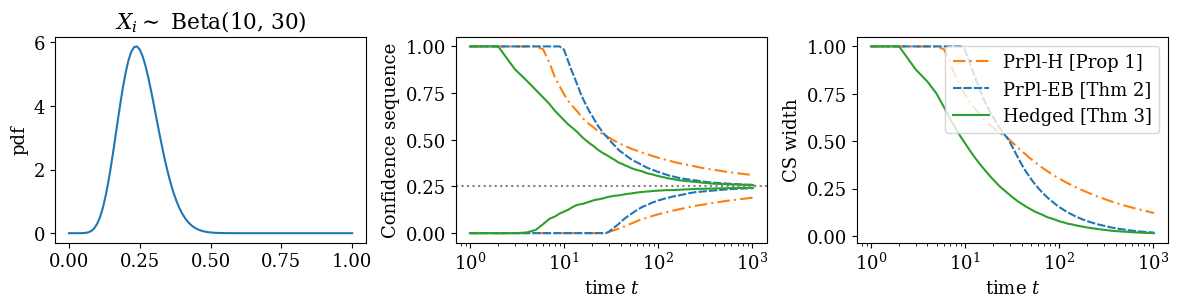

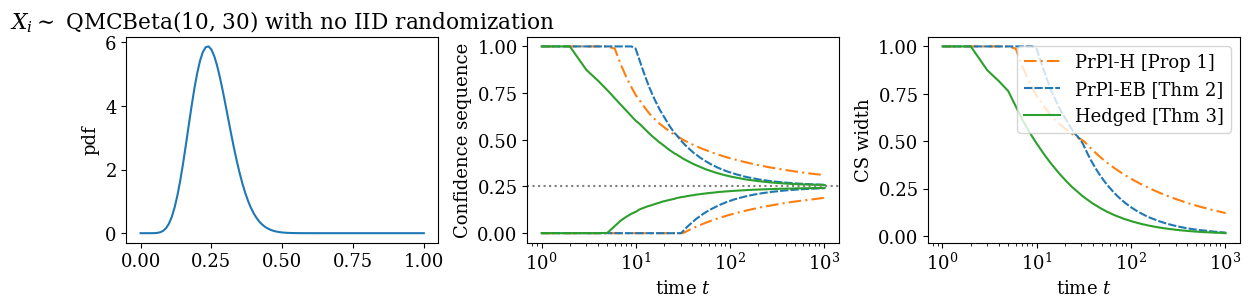

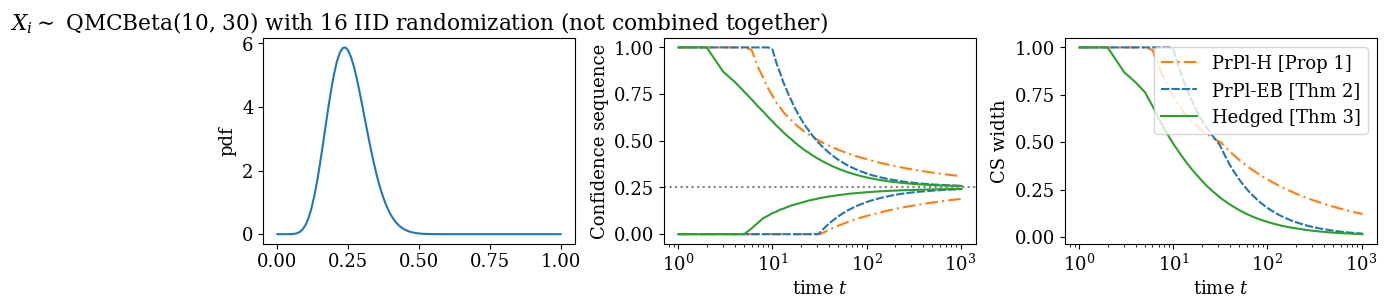

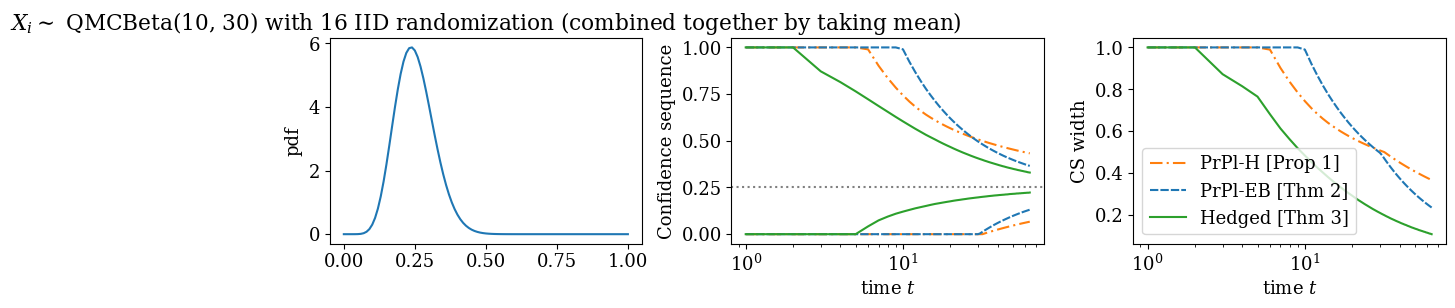

In [1]:
import sys
import os

sys.path.append(os.path.relpath("../../"))

import numpy as np
import qmcpy as qp
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import beta
from scipy.stats import multinomial
import matplotlib.cm as cm

from confseq.cs_plots import ConfseqToPlot, DataGeneratingProcess, plot_CSs
from confseq.predmix import predmix_empbern_cs, predmix_hoeffding_cs
from confseq.betting import betting_cs
%matplotlib inline

figures_location = os.path.relpath("figures/")

N = 2**10
alpha = 0.05
nsim = 5

cs_list = [
    ConfseqToPlot(
        lambda x: predmix_hoeffding_cs(x, alpha=alpha, running_intersection=True),
        "PrPl-H [Prop 1]",
        "tab:orange",
        "-.",
    ),
    ConfseqToPlot(
        lambda x: predmix_empbern_cs(
            x, truncation=0.5, alpha=alpha, running_intersection=True
        ),
        "PrPl-EB [Thm 2]",
        "tab:blue",
        "--",
    ),
    ConfseqToPlot(
        lambda x: betting_cs(
            x,
            breaks=1000,
            trunc_scale=1 / 2,
            alpha=alpha,
            parallel=True,
            running_intersection=True,
        ),
        r"Hedged [Thm 3]",
        "tab:green",
        "-",
    ),
]
def gen_qmc_samples_iid(distribution = qp.SciPyWrapper(discrete_distrib=qp.DigitalNetB2(1,seed = 7),scipy_distribs=beta(a=10,b=30))
                         , spawn_samples = 2**4,gen_samples = 2**6, comb = False):
    spw = distribution
    spws = spw.spawn(spawn_samples)
    if comb == False:
        samples = np.array([])
        for i in range (len(spws)):
            curr_samples = spws[i].gen_samples(gen_samples).flatten()
            samples = np.append(samples,curr_samples)
        return samples
    samples = spws[0].gen_samples(gen_samples).flatten()
    for i in range (len(spws)- 1):
        curr_samples = spws[i + 1].gen_samples(gen_samples).flatten()
        samples = np.vstack((samples,curr_samples))
    return np.mean(samples, axis = 0)

dgp_list = [
    DataGeneratingProcess(
        data_generator_fn=lambda: np.random.beta(10, 30, N),
        dist_fn=lambda x: beta.pdf(x, 10, 30),
        mean=1 / 4,
        name="Beta_10,_30_",
        discrete=False,
        title="$X_i \sim$ Beta(10, 30)",
    ),
      DataGeneratingProcess(
        data_generator_fn=lambda: (qp.SciPyWrapper(discrete_distrib=qp.DigitalNetB2(1),scipy_distribs=beta(a=10,b=30)).gen_samples(N)).flatten(),
        dist_fn=lambda x: beta.pdf(x, 10, 30),
        mean=1 / 4,
        name="Beta_10,_30_QMC_no_IID_rand",
        discrete=False,
        title="$X_i \sim$ QMCBeta(10, 30) with no IID randomization",
    ),
    DataGeneratingProcess(
       data_generator_fn = lambda: gen_qmc_samples_iid(comb = False),
        dist_fn=lambda x: beta.pdf(x, 10, 30),
        mean=1 / 4,
        name="Beta_10,_30_QMC_IID_rand_notcomb",
        discrete=False,
        title="$X_i \sim$ QMCBeta(10, 30) with 16 IID randomization (not combined together)",
    ),
     DataGeneratingProcess(
       data_generator_fn = lambda: gen_qmc_samples_iid(comb=True),
        dist_fn=lambda x: beta.pdf(x, 10, 30),
        mean=1 / 4,
        name="Beta_10,_30_QMC_IID_rand_comb",
        discrete=False,
        title="$X_i \sim$ QMCBeta(10, 30) with 16 IID randomization (combined together by taking mean)",
    ),
]

plot_CSs(
    dgp_list,
    cs_list,
    time_uniform=True,
    display_start=1,
    nsim=nsim,
    log_scale=True,
    folder=figures_location,
)